In [1]:
import jax
import jax.numpy as jnp
from jax import jit
from jax.lib import xla_bridge
from jax.lax import scan
from jax import random
import plotly.express as px
import MCsampler as mc
import timeit
from matplotlib import gridspec
import matplotlib.pyplot as plt

# Dimension $D=1$

## Normal Distribution

In [2]:
@jit
def P(x):
    return jnp.exp(-(x-1)**2/(2*0.1))

In [3]:
sampler = mc.Metro_Has(P,1)

In [4]:
v_n = sampler.sample(2, 1000)

1042 points accepted in 3.0945958920000294 s.


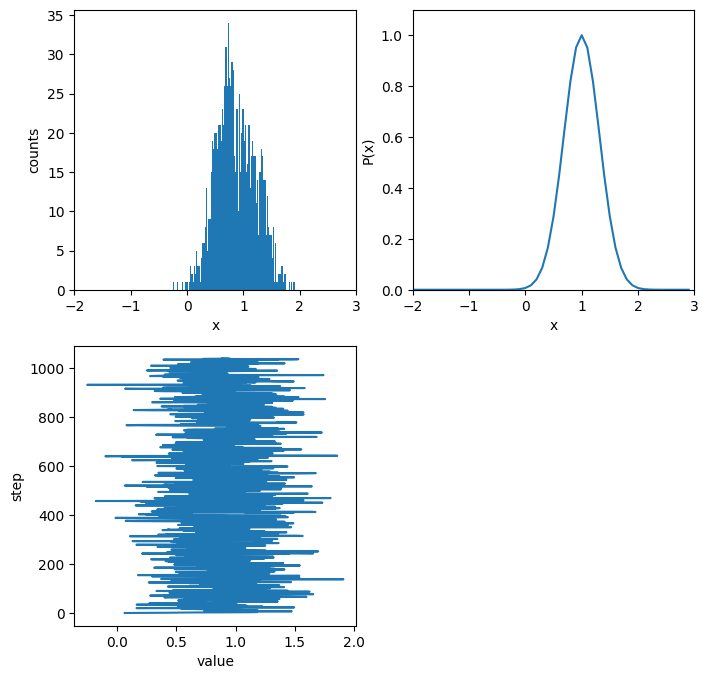

In [5]:
fig = plt.figure(figsize=(8, 8))

# Set up a 2x2 GridSpec
gs = gridspec.GridSpec(2, 2, figure=fig)

# Add three subplots in an "L" shape
ax1 = fig.add_subplot(gs[0, 0])  # Top-left
ax2 = fig.add_subplot(gs[0, 1])  # Top-right
ax3 = fig.add_subplot(gs[1, 0])  # Bottom-left

ax1.hist(v_n, bins = 100)
ax1.set_xlabel('x')
ax1.set_ylabel('counts')
ax1.set_xlim(-2,3)

ax2.plot(jnp.arange(-2,3,0.1),P(jnp.arange(-2,3,0.1)))
ax2.set_xlim(-2,3)
ax2.set_ylim(0,1.1)
ax2.set_xlabel('x')
ax2.set_ylabel('P(x)')


ax3.plot(v_n,jnp.arange(len(v_n)))
ax3.set_xlabel('value')
ax3.set_ylabel('step')

plt.show()

## Crazy distribution

In [6]:
@jit
def P(x):
    return jnp.exp(-x**2)*(2+jnp.sin(5*x)+jnp.sin(2*x))

In [7]:
sampler = mc.Metro_Has(P,1)

In [8]:
v = sampler.sample(1, 5000)

5280 points accepted in 2.1897484219999797 s.


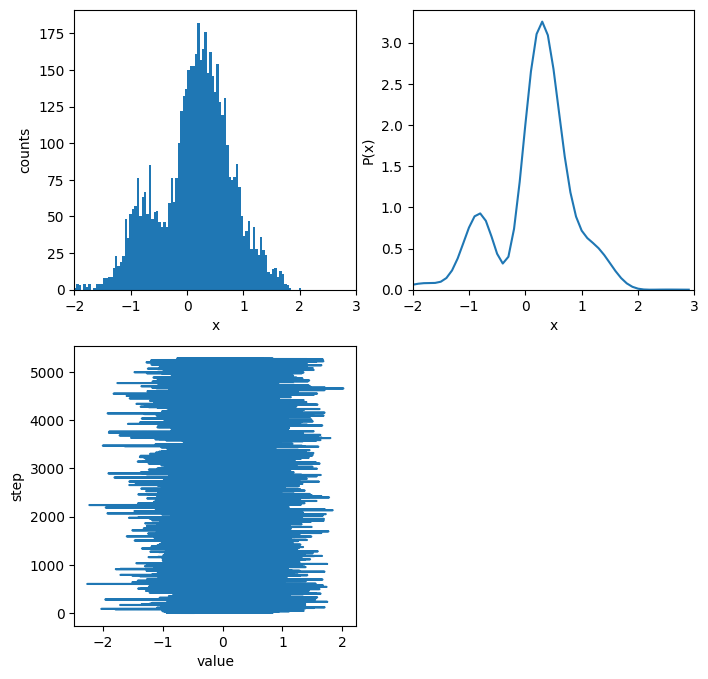

In [9]:
fig = plt.figure(figsize=(8, 8))

# Set up a 2x2 GridSpec
gs = gridspec.GridSpec(2, 2, figure=fig)

# Add three subplots in an "L" shape
ax1 = fig.add_subplot(gs[0, 0])  # Top-left
ax2 = fig.add_subplot(gs[0, 1])  # Top-right
ax3 = fig.add_subplot(gs[1, 0])  # Bottom-left

ax1.hist(v, bins = 100)
ax1.set_xlabel('x')
ax1.set_ylabel('counts')
ax1.set_xlim(-2,3)

ax2.plot(jnp.arange(-2,3,0.1),P(jnp.arange(-2,3,0.1)))
ax2.set_xlim(-2,3)
ax2.set_ylim(0,3.4)
ax2.set_xlabel('x')
ax2.set_ylabel('P(x)')

ax3.plot(v,jnp.arange(len(v)))
ax3.set_xlabel('value')
ax3.set_ylabel('step')

plt.show()

# Dimension $D=2$

## Multivariate normal distribution

In [2]:
@jit
def P(x):

    D=x.shape[0]
    cov = 0.1*jnp.array([[1,0],[0,1]])
    detcov = jnp.linalg.det(cov)
    invcov = jnp.linalg.inv(cov)
    mu = jnp.array([0,0])

    expo = jnp.matmul(jnp.transpose(x-mu), jnp.matmul(invcov,(x-mu)  ) )
    
    p = 1/(2*jnp.pi)**(D/2) * 1/jnp.sqrt(detcov) * jnp.exp(-1/2*expo)
    
    return p

In [3]:
x0 = jnp.array([1,3])
sampler_p = mc.Metro_Has(P,x0.shape[0])

In [4]:
u_p = sampler_p.sample(x0, 5000)

5517 points accepted in 8.14147463800009 s.


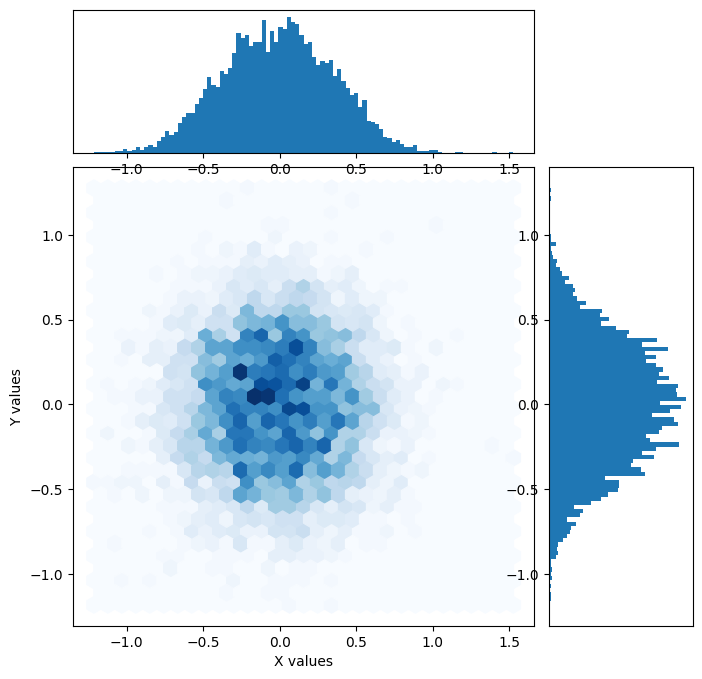

In [5]:
# Sample x and y data
x = u_p[:,0]  # Replace with your x values
y = u_p[:,1]  # Replace with your y values

# Set up figure and layout
fig = plt.figure(figsize=(8, 8))  # Set figure size (width, height)
gs = gridspec.GridSpec(4, 4, wspace=0.1, hspace=0.1)  # Define grid with small spacing

# Density heatmap in the center
ax_main = fig.add_subplot(gs[1:4, 0:3])
hb = ax_main.hexbin(x, y, gridsize=30, cmap="Blues")  # or use plt.hist2d(x, y, bins=30, cmap="Blues")
ax_main.set_xlabel('X values')
ax_main.set_ylabel('Y values')

# Histogram for x (top marginal)
ax_x = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_x.hist(x, bins=100, orientation="vertical")
ax_x.set_yticks([])  # Hide y-axis ticks for the marginal histogram

ax_x.set_xlim(ax_main.get_xlim())  # Match x-axis limits

# Histogram for y (right marginal)
ax_y = fig.add_subplot(gs[1:4, 3], sharey=ax_main)
ax_y.hist(y, bins=100, orientation="horizontal")
ax_y.set_xticks([])  # Hide x-axis ticks for the marginal histogram

ax_y.set_ylim(ax_main.get_ylim())  # Match y-axis limits

# Show the plot
plt.show()

## Product of normal and crazy distributions

In [6]:
@jit
def F(x):

    _x, _y = x
   
    d1 = jnp.exp(-(_x-1)**2/(2*0.1))
    d2 = jnp.exp(-_y**2)*(2+jnp.sin(5*_y)+jnp.sin(2*_y))
    
    return d1*d2

In [7]:
x0 = jnp.array([1,3])
sampler_d = mc.Metro_Has(F,x0.shape[0])

In [9]:
u_d = sampler_d.sample(x0, 5000)

5431 points accepted in 4.4467373519999 s.


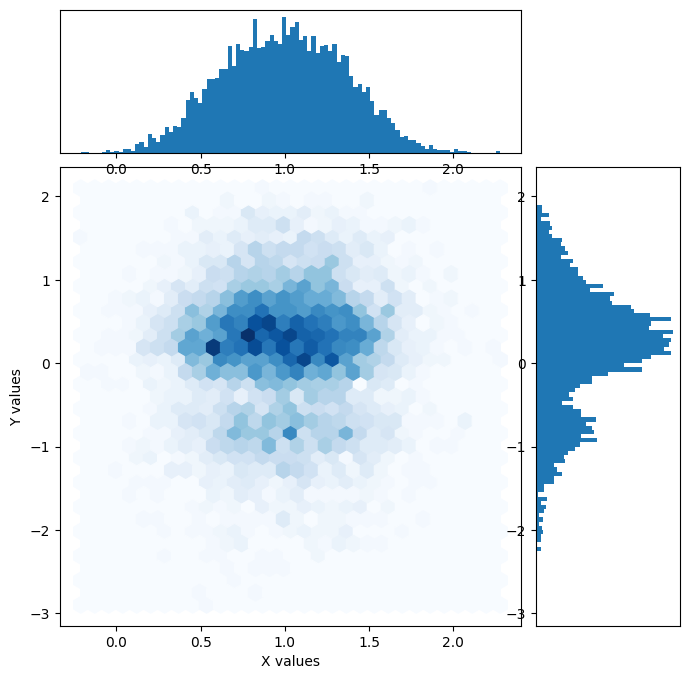

In [10]:
# Sample x and y data
x = u_d[:,0]  # Replace with your x values
y = u_d[:,1]  # Replace with your y values

# Set up figure and layout
fig = plt.figure(figsize=(8, 8))  # Set figure size (width, height)
gs = gridspec.GridSpec(4, 4, wspace=0.1, hspace=0.1)  # Define grid with small spacing

# Density heatmap in the center
ax_main = fig.add_subplot(gs[1:4, 0:3])
hb = ax_main.hexbin(x, y, gridsize=30, cmap="Blues")  # or use plt.hist2d(x, y, bins=30, cmap="Blues")
ax_main.set_xlabel('X values')
ax_main.set_ylabel('Y values')

# Histogram for x (top marginal)
ax_x = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_x.hist(x, bins=100, orientation="vertical")
ax_x.set_yticks([])  # Hide y-axis ticks for the marginal histogram

ax_x.set_xlim(ax_main.get_xlim())  # Match x-axis limits

# Histogram for y (right marginal)
ax_y = fig.add_subplot(gs[1:4, 3], sharey=ax_main)
ax_y.hist(y, bins=100, orientation="horizontal")
ax_y.set_xticks([])  # Hide x-axis ticks for the marginal histogram

ax_y.set_ylim(ax_main.get_ylim())  # Match y-axis limits

# Show the plot
plt.show()